## Evaluating Classification Models



Problem Statement : The bank is interested in identifying factors that affect client responses to new term deposit offerings, which are the focus of the marketing campaigns. What kinds of clients are most likely to subscribe to new term deposits? In other words, identify the list of banking clients that appear to be the best target for direct marketing efforts.




In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
###Loading Packages###
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import base packages into the namespace for this program
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [5]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [6]:
# initial work with the data set
bank = pd.read_csv('/Users/jessicaaddai/Documents/MSCA /Machine Learning /Assignment3 (1) 2/data/bank.csv', sep = ';')

# print first few rows of df 
bank.head()
bank.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  response   4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [8]:
# # drop observations with missing data, if any
# bank.dropna()

# examine the shape of original input data
bank.shape

(4521, 17)

In [9]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

# look at the beginning of the DataFrame
bank.head()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
# Descriptive Statistics for non-categorical variables

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


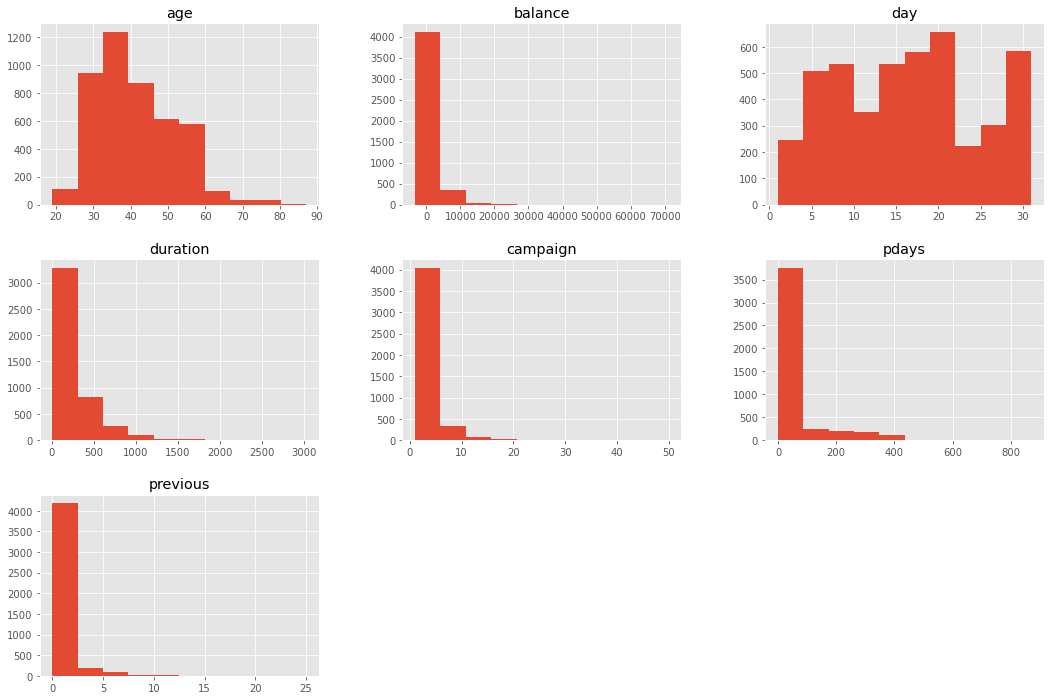

In [11]:
# Check distributions of non-categorical variables
bank.hist(figsize=(18,12));

In [12]:
bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

<AxesSubplot:xlabel='count', ylabel='response'>

Text(0.5, 1.0, 'Response by Age')

<Figure size 432x288 with 0 Axes>

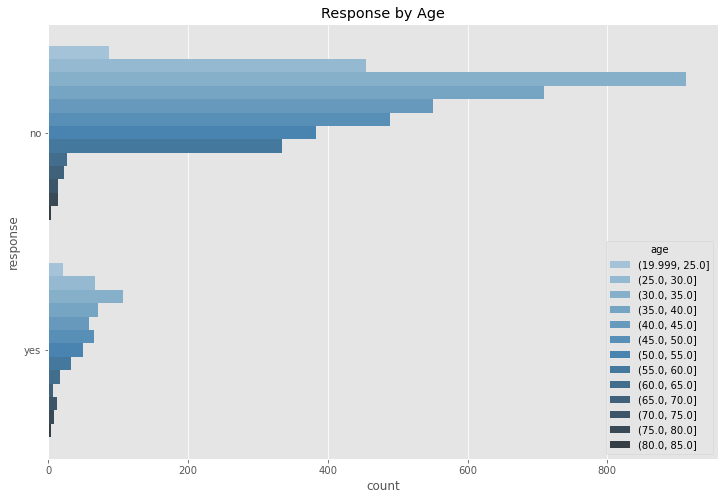

In [13]:
#Clearly shows the distribution between yes and no responses. 
bank['age'] = pd.cut(bank.age, bins=[g for g in range(20, 90, 5)], include_lowest=True)
fig=plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(y='response', hue='age', data=bank, palette="Blues_d")
plt.title('Response by Age')
plt.show()

In [14]:
#Most age groups are between 30-38. 
bank['age'].value_counts()

(30.0, 35.0]      1020
(35.0, 40.0]       780
(40.0, 45.0]       608
(45.0, 50.0]       554
(25.0, 30.0]       521
(50.0, 55.0]       432
(55.0, 60.0]       368
(19.999, 25.0]     107
(60.0, 65.0]        44
(65.0, 70.0]        29
(70.0, 75.0]        25
(75.0, 80.0]        21
(80.0, 85.0]         6
Name: age, dtype: int64

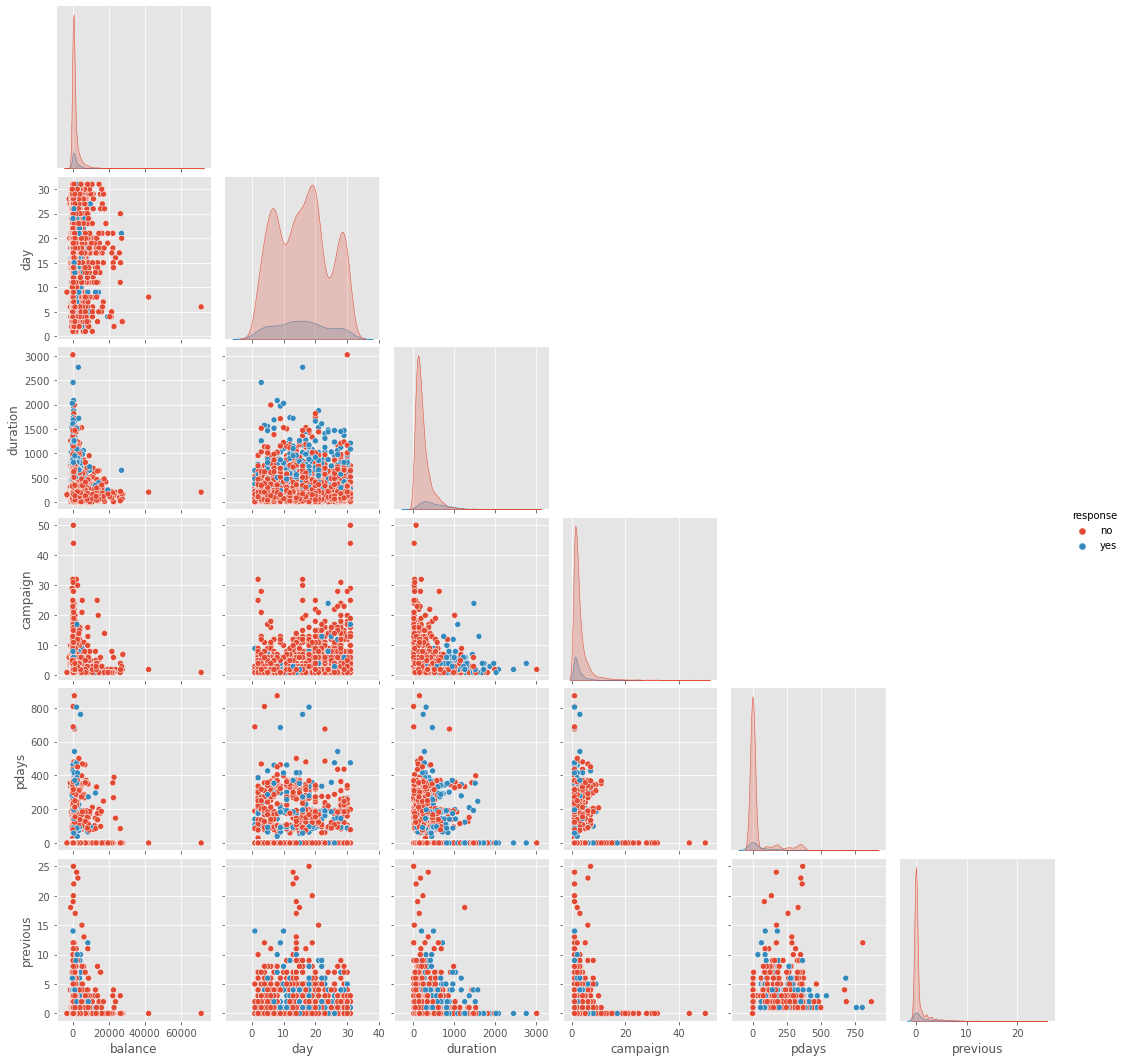

In [15]:
#scatterplot between responce and numerical variables. The responses look randomly scattered. 
scat_p = sns.pairplot(data= bank, hue='response', corner = True)

In [16]:
#Shows that majority of clients were not contacted from a previous campaign 
#A column could be created for contacted where not contacted =1 and contacted = 0 to see how it could afect our model
#For now I will leave the dataset as it is. 
bank['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
 91       11
 181      10
 169      10
 370       9
 364       9
 349       8
 99        8
 167       8
 94        8
 172       7
 184       7
 2         7
 176       7
 85        6
 175       6
 185       6
 351       6
 342       6
 345       6
 152       6
 87        6
 266       6
 95        6
 173       6
 368       6
 96        6
 150       6
 105       5
 272       5
 120       5
 360       5
 356       5
 170       5
 271       5
 357       5
 174       5
 367       5
 90        5
 350       5
 371       5
 330       5
 190       5
 98        4
 241       4
 358       4
 337       4
 327       4
 189       4
 273       4
 322       4
 147       4
 84        4
 344       4
 246       4
 112       4
 247       4
 340       4
 259       4
 107       4
 78        4
 195       4
 93        4
 335       4
 188       4
 127       4
 347       4
 97        4
 196       4
 366       3
 146       3
 339       3
 186       3

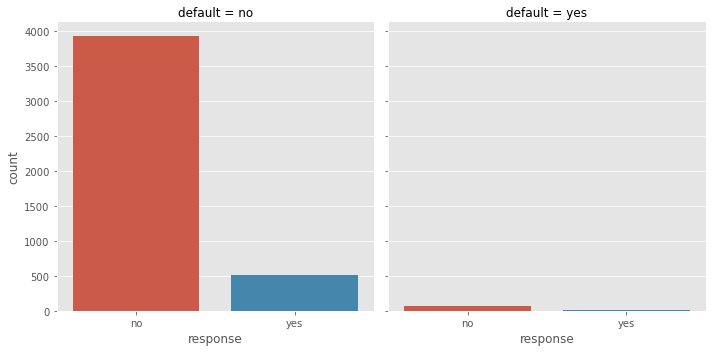

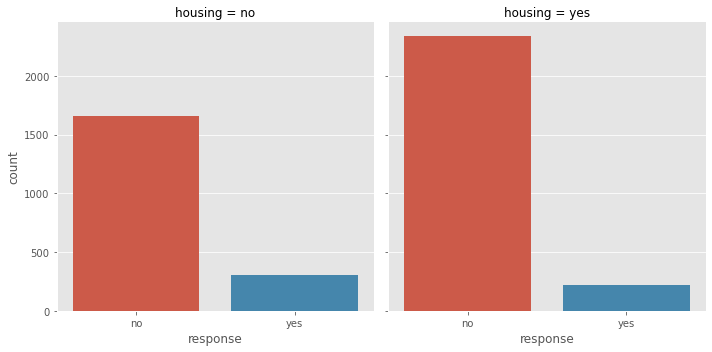

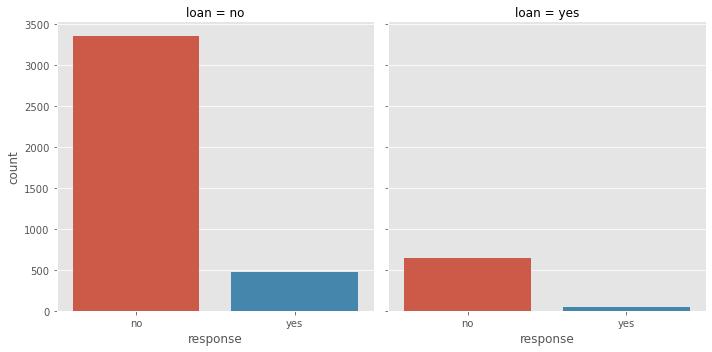

In [17]:
#Taking a look at my binary variables and how they relate to eachother. 
x = 'response' 
y = ['default', 'housing', 'loan']
bin_plot = [sns.catplot(x=x, col=y_, data=bank, kind="count") for y_ in y ]

<Figure size 432x288 with 0 Axes>

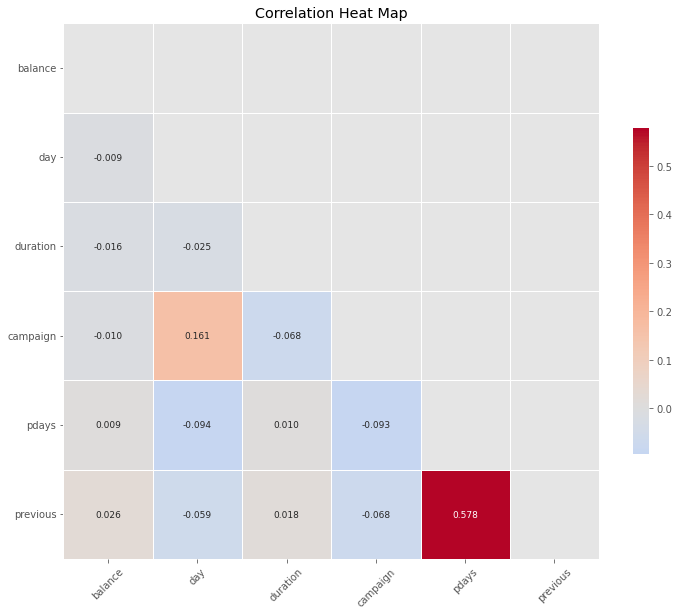

In [18]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = bank) 

In [19]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [20]:
#Check "model_data" structure
print(model_data)

[[0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 0]]


In [21]:
# Check the frequency of "default", "loan", "housing" by "response"
(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

# pd.crosstab([bank['default'],bank['loan'],bank['housing']],columns=bank['response'])

# # Check the frequency of "default", "loan", "housing" by "response"
# print(pd.crosstab([bank['default'],bank['loan'],bank['housing']], [bank['response']], margins=True))

response                no  yes   All
default loan housing                 
no      no   no       1381  279  1660
             yes      1927  192  2119
        yes  no        255   16   271
             yes       370   25   395
yes     no   no         13    4    17
             yes        31    3    34
        yes  no         12    2    14
             yes        11    0    11
All                   4000  521  4521

In [22]:
ct = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=True))
ct_nm = (pd.crosstab([bank['default'],bank['loan'],bank['housing']], 
                  [bank['response']], margins=False))
ct2 = pd.crosstab(bank.response,bank.default)
ct3 = pd.crosstab(bank.response,bank.loan)
ct4 = pd.crosstab(bank.response,bank.housing)

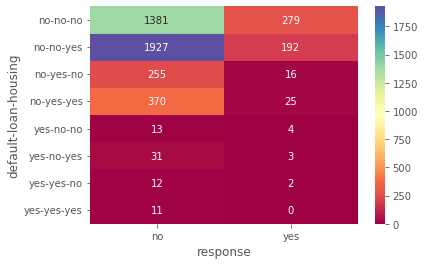

<Figure size 432x288 with 0 Axes>

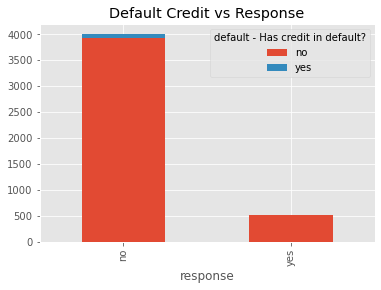

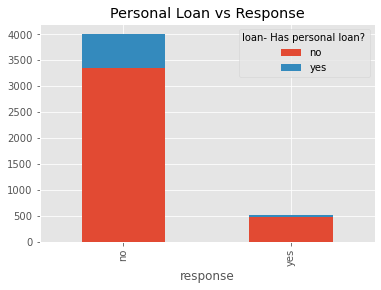

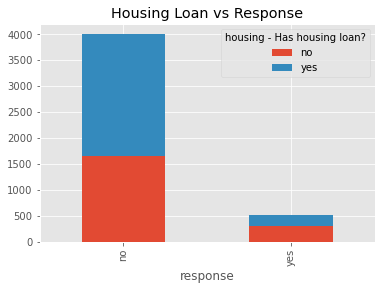

In [23]:
plt.figure()
sns.heatmap(ct_nm,cmap="Spectral", annot=True, cbar=True,fmt='g');

plt.figure()
ct2.plot.bar(stacked=True)
plt.legend(title='default - Has credit in default?')
plt.title("Default Credit vs Response")
plt.show();

ct3.plot.bar(stacked=True)
plt.legend(title='loan- Has personal loan?')
plt.title("Personal Loan vs Response")
plt.show();

ct4.plot.bar(stacked=True)
plt.legend(title='housing - Has housing loan?')
plt.title("Housing Loan vs Response")
plt.show();


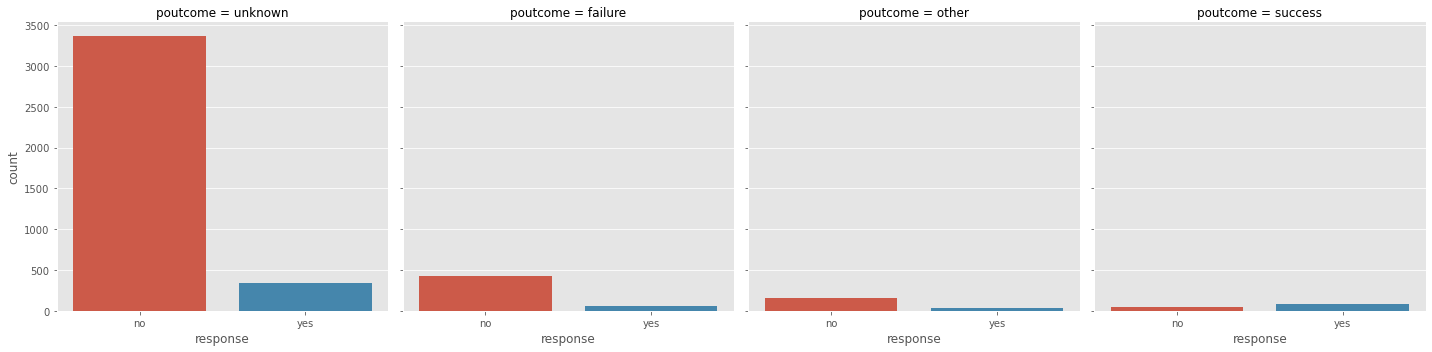

In [24]:
sns.catplot(x="response", col="poutcome", data=bank, kind="count")

####  The rest of the program should set up the modeling methods & evaluation within a cross-validation design
#### Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.



In [25]:
# shuffle is by the first index, which is the rows
np.random.seed(RANDOM_SEED)
# np.random.shuffle(model_data)


# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

#Names for classifier models
names = ["Logistic_Regression", "Naive_Bayes"]

# list of classifiers
classifiers = [LogisticRegression(), BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False)]

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


# --------------------------------------------------------


Data dimensions: (4521, 4)



Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5878522062732588


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

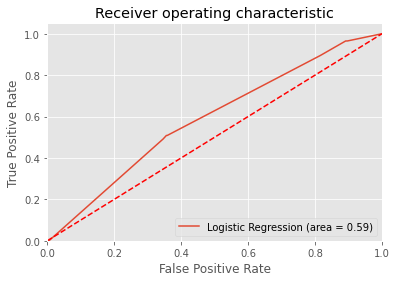


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5878522062732588


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

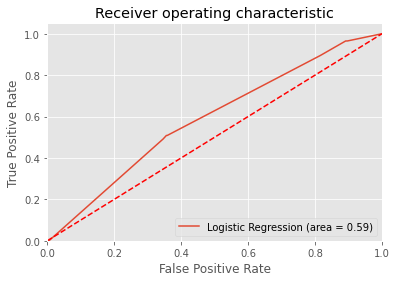


Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.633727778967659


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

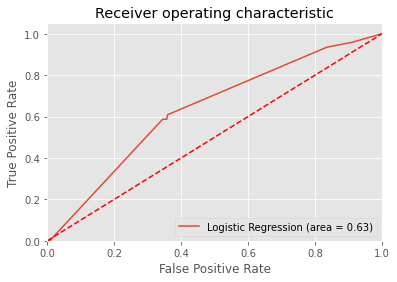


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.633727778967659


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

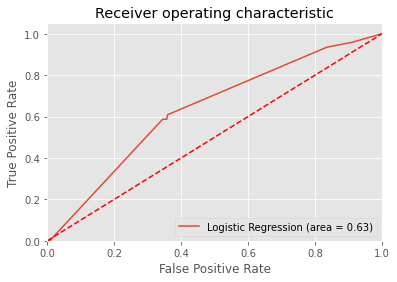


Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.6575354454752319


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

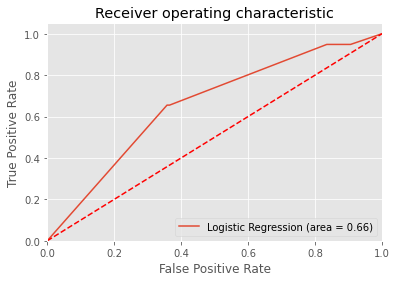


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6575354454752319


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

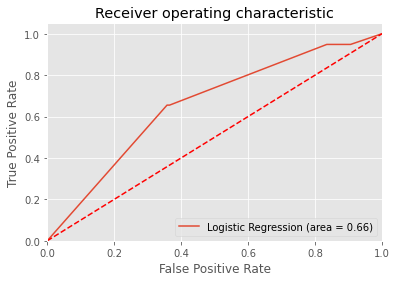


Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.6355648959335594


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

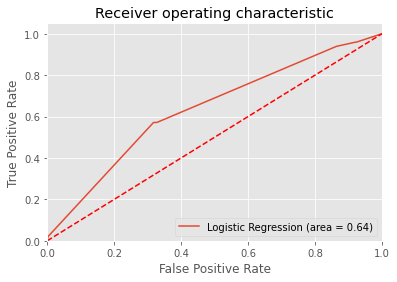


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.6373879576644552


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

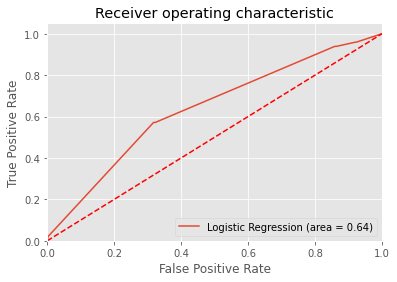


Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5743993962517295


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

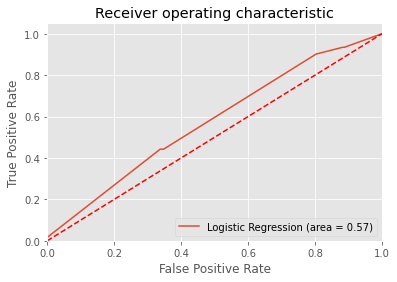


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5743993962517295


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

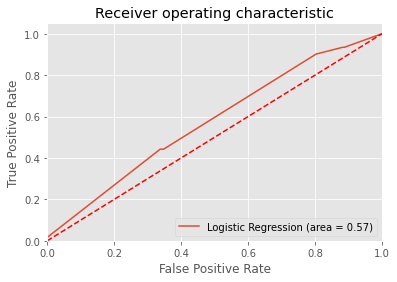


Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5842383241350662


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

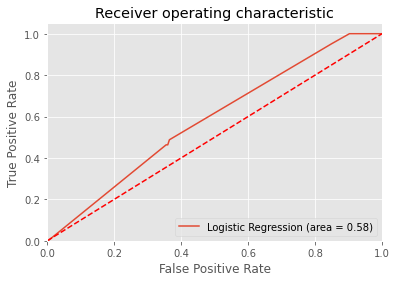


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5746839950151327


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

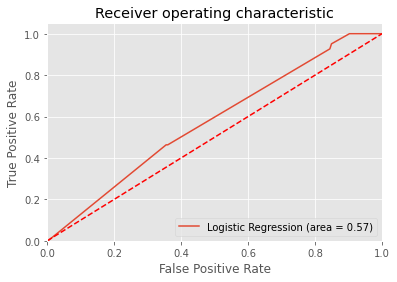


Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5625116322352502


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

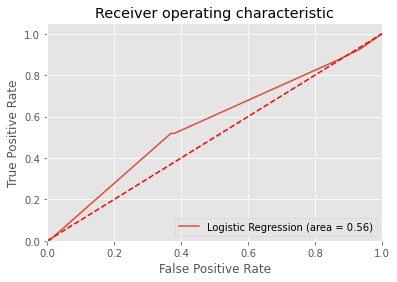


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5625116322352502


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

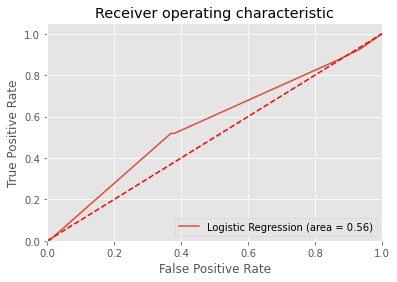


Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.7311441622103387


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

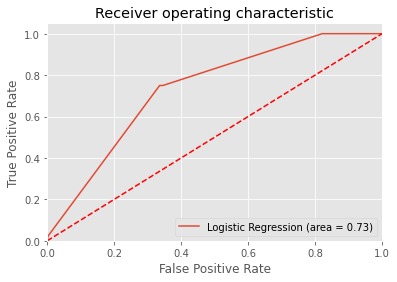


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.7311441622103387


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

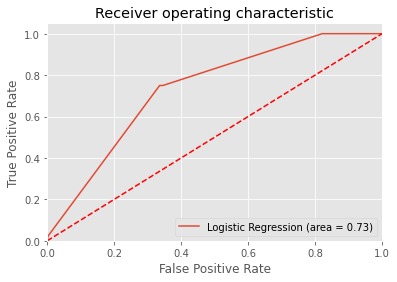


Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5735328888258382


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

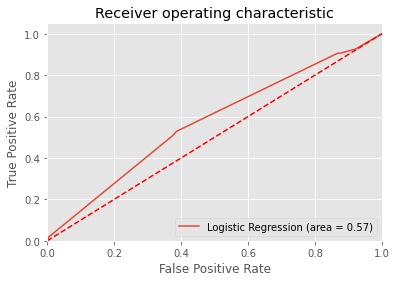


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5735328888258382


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

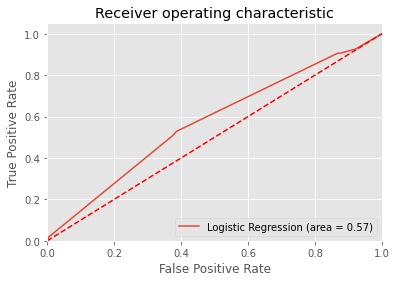


Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()


LogisticRegression()

Area under ROC curve: 0.5768204095921582


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

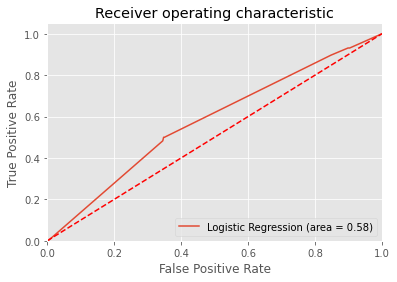


Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)


BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Area under ROC curve: 0.5778268860493612


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

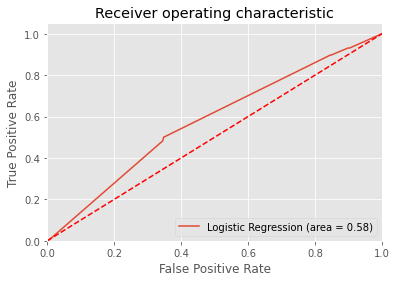

464


----------------------------------------------

Average results from 10-fold cross-validation

Method Area under ROC Curve:
Logistic_Regression    0.611733
Naive_Bayes            0.611060
dtype: float64

Mean of cross validation result: Logistic_Regression    0.611733
Naive_Bayes            0.611060
dtype: float64


In [26]:
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix



# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False)
# check the splitting process by looking at fold observation counts

index_for_fold = 0  # fold count initialized

for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')

    
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]

#   and model_data.shape[1]-1 is the index for the response variable
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]  
    
#  structure of data after split for x, y 
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    classifier_count = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
       
    # Calculate predictions to evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
    # calculates ROC AUC score, stores results in cv_results
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, classifier_count] = fold_method_result
        
        #create ROC curve to validate method prediction
        logit_roc_auc = roc_auc_score(y_test, y_test_predict[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])
        
        plt.figure()
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()
        from sklearn.metrics import plot_precision_recall_curve
        classifier_count += 1
  
    index_for_fold += 1




# pandas DataFrame gets assigned cross fold evaluation results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
with open("cv-results-df.txt", "w") as text_file:
    text_file.write('\nResults from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                     '\nMethod Area under ROC Curve:\n'+ 
                     str(cv_results_df))

# print mean of ROC AUC evaluation results for each classifier, saves to file
print('\n----------------------------------------------')
print('\nAverage results from {}-fold cross-validation\n\nMethod Area under ROC Curve:\n{}'
      .format(str(N_FOLDS),str(cv_results_df.mean())), sep = '')     
print('\nMean of cross validation result: {}'.format(cv_results_df.mean())) 




LogisticRegression()

Logistic: f1=0.000 auc=0.119


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

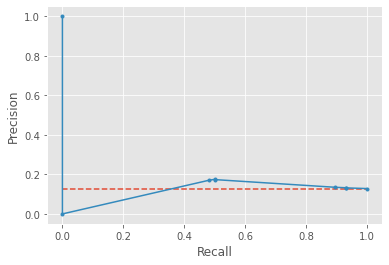

In [27]:
#Precision and Recall
# precision-recall curve and f1
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# fit a model
model = LogisticRegression(solver='lbfgs') 

model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs) 
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision) 
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
response = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [response, response], linestyle='--', label='response') 
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall') 
pyplot.ylabel('Precision') # show the legend pyplot.legend()
# show the plot pyplot.show()

BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

Logistic: f1=0.252 auc=0.119


Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

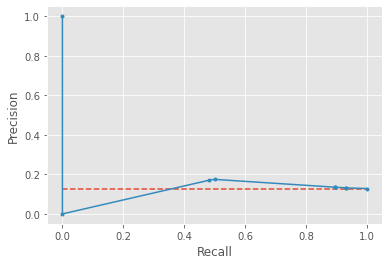

In [28]:
#Precision and Recall
# precision-recall curve and f1
from sklearn.datasets import make_classification  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# fit a model
model = BernoulliNB(alpha=1.0, binarize=0.5,
                                class_prior = [0.5, 0.5], fit_prior=False)

model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs) 
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision) 
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
response = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [response, response], linestyle='--', label='response') 
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall') 
pyplot.ylabel('Precision') # show the legend pyplot.legend()
# show the plot pyplot.show()

### In summary (mean scores) Precision, recall, accuracy, f1, etc for Logistic Regression and Naive Bayes. 


In [33]:
## Make a copy of our data to assign the df to a new object in memory
df = (bank.copy()[['response', 'default', 'housing', 'loan']])
df

,response,default,housing,loan
0,no,no,no,no
1,no,no,yes,yes
2,no,no,yes,no
3,no,no,yes,yes
4,no,no,yes,no
...,...,...,...,...
4516,no,no,yes,no
4517,no,yes,yes,yes
4518,no,no,no,no
4519,no,no,no,no


In [34]:
# binary dictionary
convert_to_binary = {'no' : 0, 'yes' : 1}

#convert the yes/no to 1/0 for our target features
for cl in df.columns:
  df[cl] = df[cl].map(convert_to_binary)

df.head()
df.describe()


,response,default,housing,loan
0,0,0,0,0
1,0,0,1,1
2,0,0,1,0
3,0,0,1,1
4,0,0,1,0


,response,default,housing,loan
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.115240,0.016810,0.566025,0.152842
std,0.319347,0.128575,0.495676,0.359875
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [35]:
from sklearn.model_selection import train_test_split
y = df['response']
X = df.drop('response', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = RANDOM_SEED)# 80% training and 20% test
print('X_Train', X_train.shape)
print('X_Test', X_test.shape)
print('y_Train', y_train.shape)
print('y_Test', y_test.shape)
 

X_Train (3616, 3)
X_Test (905, 3)
y_Train (3616,)
y_Test (905,)


#### Logistic regression 

In [36]:
# Fit and predict test class probabilities
logreg = LogisticRegression(max_iter=10000, penalty='none')
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)


LogisticRegression(max_iter=10000, penalty='none')

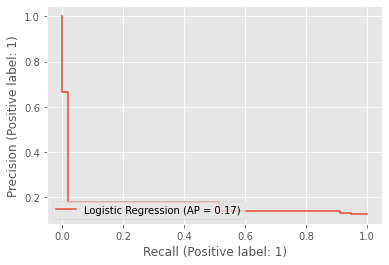

In [37]:
from sklearn.metrics import plot_precision_recall_curve

pr=plot_precision_recall_curve(logreg, X_test, y_test, name = 'Logistic Regression')


In [38]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [39]:
from sklearn.model_selection import GridSearchCV

## ADD 
## Print out the many mean_test_scores from each scoring pass
## The grid_params are the same as above ('balanced', 'none')
mean_cv_scores = pd.DataFrame(columns=['scored_ON'])
grid_params = {"class_weight":['balanced', "none"]}
for sc_ in ['recall', 'accuracy', 'average_precision', 'f1', 'roc_auc','balanced_accuracy']:
  cv_obj = GridSearchCV(logreg, param_grid=grid_params, cv=cv, scoring=sc_)
  cv_obj.fit(X_train, y_train)
  score_df = pd.DataFrame(pd.DataFrame(cv_obj.cv_results_, index=grid_params['class_weight'])['mean_test_score']).T
  score_df['scored_ON'] = sc_
  mean_cv_scores= pd.concat([mean_cv_scores, score_df])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']},
             scoring='recall')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']},
             scoring='accuracy')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']},
             scoring='average_precision')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']}, scoring='f1')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']},
             scoring='roc_auc')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='none'),
             param_grid={'class_weight': ['balanced', 'none']},
             scoring='balanced_accuracy')

In [40]:
mean_cv_scores

,scored_ON,balanced,none
mean_test_score,recall,0.556730,0.000000
mean_test_score,accuracy,0.634950,0.887722
mean_test_score,average_precision,0.145417,0.145942
mean_test_score,f1,0.255295,0.000000
mean_test_score,roc_auc,0.600572,0.606076
mean_test_score,balanced_accuracy,0.600795,0.500000


### Naive Bayes
#### Bernoulli

In [41]:
# Fit and predict test class probabilities
nb = BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False)
nb.fit(X_train, y_train)
y_pred = nb.predict_proba(X_test)[:,1]

BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

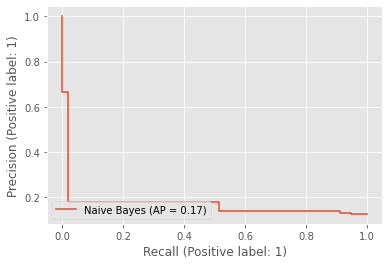

In [42]:
from sklearn.metrics import plot_precision_recall_curve

pr=plot_precision_recall_curve(nb, X_test, y_test, name = 'Naive Bayes')


In [43]:

#NaiveBayes CV test
mean_cv_scores = pd.DataFrame(columns=['scored_ON'])


nb_classifier = BernoulliNB()
grid_params = {"alpha":[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]}

for sc_ in ['recall', 'accuracy', 'average_precision', 'f1', 'roc_auc','balanced_accuracy']:
  cv_obj = GridSearchCV(nb_classifier, param_grid=grid_params, cv=10, scoring=sc_)
  cv_obj.fit(X_train, y_train)
  score_df = pd.DataFrame(pd.DataFrame(cv_obj.cv_results_, index=grid_params['alpha'])['mean_test_score']).T
  score_df['scored_ON'] = sc_
  mean_cv_scores= pd.concat([mean_cv_scores, score_df])


GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='recall')

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='accuracy')

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='average_precision')

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='f1')

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='roc_auc')

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                   5.0]},
             scoring='balanced_accuracy')

In [44]:
print('Measures from Naive Bayes (Bernoulli)')
mean_cv_scores

Measures from Naive Bayes (Bernoulli)


,scored_ON,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
mean_test_score,recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean_test_score,accuracy,0.887723,0.887723,0.887723,0.887723,0.887723,0.887723,0.887723,0.887723,0.887723
mean_test_score,average_precision,0.149872,0.150141,0.149999,0.150249,0.150249,0.150249,0.150547,0.150549,0.150362
mean_test_score,f1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean_test_score,roc_auc,0.603939,0.605304,0.603817,0.604896,0.604896,0.604896,0.605921,0.605843,0.604248
mean_test_score,balanced_accuracy,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


#### Gaussian

In [45]:
 from sklearn.model_selection import StratifiedKFold


In [46]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={}, scoring='f1')

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)


F1-Score on test data is : 0.000
Area under ROC on test data is : 0.500
Accuracy on test data is : 0.873


### SVM

In [48]:
from sklearn.svm import SVC
params = [
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["poly"],
              "degree" : [2, 3, 4],
              "gamma" : ["auto", 0.1, 0.5]
            },
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["rbf", "sigmoid"], 
              "gamma" : ["auto", 0.1, 0.5]},
            {"C" : [0.3, 1.0, 3.0], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(class_weight = "balanced", max_iter = 5000, verbose = True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
..........
*
optimization finished, #iter = 2479
obj = -716.220902, rho = 0.999889
nSV = 2464, nBSV = 2135
Total nSV = 2464
*
optimization finished, #iter = 2545
obj = -733.239387, rho = 1.000137
nSV = 2533, nBSV = 2526
Total nSV = 2533

*
optimization finished, #iter = 2627
obj = -749.228123, rho = 0.999982
nSV = 2584, nBSV = 2255
Total nSV = 2584
*
optimization finished, #iter = 2539
obj = -719.002086, rho = 0.999655
nSV = 2475, nBSV = 2468
Total nSV = 2475
*
optimization finished, #iter = 2891
obj = -833.964316, rho = 0.407835
nSV = 2892, nBSV = 2891
Total nSV = 2892
.........*
optimization finished, #iter = 2501
obj = -712.055396, rho = 0.999842
nSV = 2445, nBSV = 2437
Total nSV = 2445
.*
optimization finished, #iter = 2425
obj = -701.042502, rho = 0.999705
nSV = 2398, nBSV = 2391
Total nSV = 2398
*
optimization finished, #iter = 2892
obj = -825.081709, rho = 1.000000
nSV = 2893, nBSV = 2892
Total nSV = 2893

*
optimizat

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(class_weight='balanced', max_iter=5000,
                           verbose=True),
             n_jobs=-1,
             param_grid=[{'C': [0.3, 1.0, 3.0], 'degree': [2, 3, 4],
                          'gamma': ['auto', 0.1, 0.5], 'kernel': ['poly']},
                         {'C': [0.3, 1.0, 3.0], 'gamma': ['auto', 0.1, 0.5],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.3, 1.0, 3.0], 'kernel': ['linear']}],
             scoring='f1', verbose=2)

In [49]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

F1-Score on test data is : 0.265
Area under ROC on test data is : 0.584
Accuracy on test data is : 0.638


### Bank Marketing Study: 
Imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns: 
- Which of the two modeling methods would you recommend and why? 
- And, given the results of your research, which group of banking clients appears to be the best target for direct marketing 
  efforts? 

#### REPORT/FINDINGS: 

##### (1) A summary and problem definition for management; 

###### Companies reach out to clients/customers for various reasons. A reason could be to sell a new product, get customer feedback to better their business or to even just check on a customer as a form of courtesy or to boost customer satisfaction. Telemarketing can be beneficial as it has the ability reduce operational costs, boost sales, gather and compile accurate campaign data, etc. As a bank, it is crucial to have some kind of connection with customers, especially when it comes to marketing. It wouldn't be beneficial to random dial multiple customers as it's both a waste of time and resources. It would be more efficient to target customers/clients who are more likely to participate in the programs / products being offered. This would be able to reduce operational costs, hence increasing our return on investment (ROI). 
---
##### (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
#### The data had 4521 rows and 17 columns, no missing values. The columns provided detailed information such as job, marital, education, balance, etc. Three features were evaluated: default (Does the client have their credit in default or not), housing (Does the client have a housing loan or not), and loan (Does the client have a personal loan or not).
#### Most responses were no (Client’s didn’t subscribe to a term deposit). There were 4000 no responses and 521 yes responses (Client’s subscribed to a term deposit). Descriptive statistics were conducted and viewing the distribution of numerical variables, most were skewed to the right, however, outliers weren’t removed since the scale it was on made sense.  Looking at the frequency of default, loan, and housing by response, most yes responses, didn’t have a credit default or personal loan (amounted to 90.4% of yes responses). Looking at the correlation heat map, there weren’t very high correlations throughout. The closest highly correlated pair would be between pdays and previous at 0.578. 
#### Two supervised models were built for this binary classification task. Naïve Bayes and Logistic Regression were two main classification methods chosen. The performance were evaluated through ROC and Precision / Recall graphs, accuracy score, and F-1 score, which is the weighted average of precision and recall ( F1 score reaches its best value at 1 and worst at 0). 
#### The AUC (Area Under the Curve) ROC (Receiver Operating Characteristics) curve is an important evaluation metric used in checking model performance where ROC is a probability curve and AUC represents the degree or measure of separability. Average results from 10 fold cross validation for logistic regression and naïve bayes were around the same for auc scores (61%). If one takes a closer look, logistic regression did much better. SVM was also evaluated as an extra model. The F-1 score was 0.265, roc auc score of 0.584 (Lowest among all models)


---
##### (3) List assumptions, programming work, issues along with model evaluation metrics; and 
###### Python packages such as Scikit Learn was primarily used for machine-learning and to evaluate models

##### Most of the programming work went into building the models and evaluating them. Cross validation was used on all models. The scores could use a little bit of work. We could do some feature engineering or create more features that would be better predictors. Perhaps this could be an indicator for the bank to even do deeper analysis as to why the yes responses are so low. This might better help models. 
---
##### (4) Review of results/ insight swith recommendations for management
#####   In review of all of my metrics, especially in terms of F-1 and auc, I would say logistic regression was my better modeling method 61.17% , hence this is the recommended method. Through the review of results around the features default, housing and loan, around 90.4% of yes responses were from clients without personal loans or credit defaults, hence, it is recommended that these clients could be contacted first atleast to reduce operational costs/resources. It'll also be more insightful/ useful to look into more explanatory variables that could make models perform much better. 